# Linear Regression with Multiple Features

### Using 2 features predict `salary`

In [18]:
# import pandas
import pandas as pd

#import the dataset
df = pd.read_csv('Pay.csv')
df.shape

(200, 3)

In [19]:
# find correlations
df.corr()

,Salary,Experience,Age
Salary,1.000000,0.026408,0.781475
Experience,0.026408,1.000000,0.174294
Age,0.781475,0.174294,1.000000


### Feature Selection


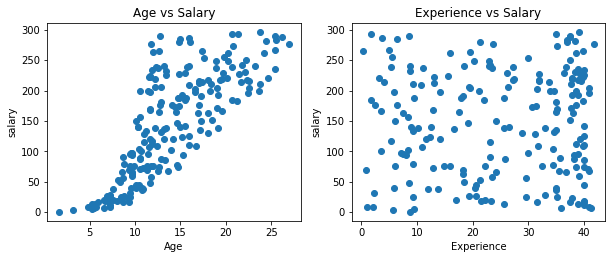

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.scatter(df.Age, df.Salary)
plt.xlabel('Age')
plt.ylabel('salary')
plt.title('Age vs Salary')


plt.subplot(2,2,2)
plt.scatter(df.Experience, df.Salary)
plt.xlabel('Experience')
plt.ylabel('salary')
plt.title('Experience vs Salary')
plt.show()

## Now let's build a simple linear regression model

We will use the variable `Age` to predict `Salary`

In [21]:
df.head()

,Salary,Experience,Age
0,217.7,32.0,19.4
1,137.9,33.0,19.2
2,135.2,35.0,17.2
3,110.7,40.0,16.0
4,7.8,36.0,6.6


In [22]:
# Seperate features and target
x = df[['Age']]
y = df[['Salary']]

In [23]:
# import module
from sklearn.model_selection import train_test_split

# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=123)

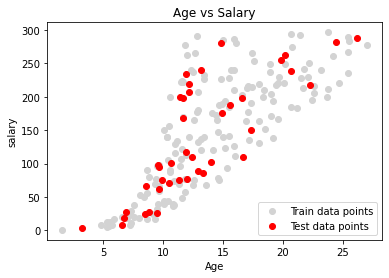

In [24]:
plt.scatter(x_train,y_train,color='lightgray')
plt.scatter(x_test, y_test, color='red')
plt.xlabel('Age')
plt.ylabel('salary')
plt.title('Age vs Salary')
plt.legend(['Train data points','Test data points'], loc='lower right')
plt.show()

In [31]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((160, 1), (160, 1), (40, 1), (40, 1))

In [26]:
# import the model
from sklearn.linear_model import LinearRegression

# Create an instance of the model
Regression = LinearRegression()

In [27]:
# train the model
model = Regression.fit(x_train,y_train)

In [32]:
# Make prediction on train set
y_trainpred = model.predict(x_train)

# make prediction on test set
y_pred = model.predict(x_test)

In [16]:
#ddf = pd.DataFrame()
ddf['x_test'] = x_test
ddf['y_pred'] = y_pred
ddf['y_test'] = y_test

In [17]:
ddf

,x_test,y_pred,y_test
50,10.5,101.783101,70.6
127,12.2,123.285579,206.8
37,16.7,180.203902,109.8
149,11.7,116.961321,168.4
19,24.4,277.597477,281.4
104,8.6,77.750920,66.1
179,17.3,187.793012,149.7
53,11.9,119.491024,234.5
162,9.5,89.134585,25.6
158,15.6,166.290534,187.8


In [34]:
from sklearn.metrics import mean_squared_error

# evaluate the model
rmse1 = mean_squared_error(y_trainpred, y_train, squared=False)
rmse2 = mean_squared_error(y_pred, y_test, squared=False)
print('rmse on train set is',rmse1)
print('rmse on test set is', rmse2)

rmse on train set is 53.70545136432151
rmse on test set is 52.41133235009226


#### Now use only `Experience` variable to predict `Salary`

In [40]:
# split the independant and target variables.
x = df[['Experience']]
y = df[['Salary']]

Let's split the data into train set and test set

In [41]:
# split the datset
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=32) # set random state to get the same results

Train the model on the training set

In [42]:
# create an instance of the model
Regression = LinearRegression()

In [43]:
# train the model
model2 = Regression.fit(x_train,y_train)

In [44]:
# make prediction on train set
y_trainpred2 = model2.predict(x_train)

# make prediction on test set
y_pred2 = model2.predict(x_test)

In [45]:
# evaluate the model
rmse1 = mean_squared_error(y_trainpred2, y_train, squared=False)
rmse2 = mean_squared_error(y_pred2, y_test, squared=False)
print('rmse on train set is',rmse1)
print('rmse on test set is', rmse2)

rmse on train set is 83.08954127363567
rmse on test set is 95.27014216435656


**Observation:**

* The error on test set with only `Age` variable is 52
* The error on test set with only `Experience` variable is 95

## Exercise

#### Check whether the error improves if we use both `Age` and `Experiene` variables to predict `Salary`

In [30]:
# split the independant and target variables.
x = df[['Experience','Age']]
y = df[['Salary']]